## Geojson Assignment: Rhysea

Note: For this assignment, I am going to use a dataset from the Los Angeles GeoHub that shows liquefaction zones in the city. I might use it for my final project, which will relate to earthquake data. Liquefaction zones are of importance in earthquake country, because shaking in these zones can cause liquefaction which can destroy foundations of buildings, causing great damage and loss of lives. 

#### Importing Tools and Data

In [1]:
%load_ext lab_black

In [2]:
import pandas as pd
import geopandas as gpd

In [3]:
pd.options.display.max_columns = 1000
pd.options.display.max_rows = 1000

In [6]:
liquefaction = gpd.read_file("../data/geo/Liquefaction_zones.geojson")

#### Analyzing and Subsetting Data

In [7]:
liquefaction.head()

,OBJECTID,ID,CA_MAP_LEGEND,QUAD_NAME,RELEASED,REVISED,PREV_DATES,GEOPDFLINK,REPORTLINK,COMMENTS,ShapeSTArea,ShapeSTLength,geometry
0,725,None,Liquefaction (potential for permanent ground d...,Acton,2003-09-24,N,,http://gmw.conservation.ca.gov/SHP/EZRIM/Maps/...,http://gmw.conservation.ca.gov/SHP/EZRIM/Repor...,,8.678768e+05,9971.410579,"POLYGON ((-118.23058 34.46850, -118.23073 34.4..."
1,726,None,Liquefaction (potential for permanent ground d...,Acton,2003-09-24,N,,http://gmw.conservation.ca.gov/SHP/EZRIM/Maps/...,http://gmw.conservation.ca.gov/SHP/EZRIM/Repor...,,1.252279e+06,21616.787939,"POLYGON ((-118.17082 34.42521, -118.17042 34.4..."
2,727,None,Liquefaction (potential for permanent ground d...,Acton,2003-09-24,N,,http://gmw.conservation.ca.gov/SHP/EZRIM/Maps/...,http://gmw.conservation.ca.gov/SHP/EZRIM/Repor...,,1.435031e+08,496738.095837,"POLYGON ((-118.22109 34.49520, -118.22149 34.4..."
3,728,None,Liquefaction (potential for permanent ground d...,Agua Dulce,2003-04-17,N,,http://gmw.conservation.ca.gov/SHP/EZRIM/Maps/...,http://gmw.conservation.ca.gov/SHP/EZRIM/Repor...,,2.628279e+05,3075.130227,"POLYGON ((-118.37591 34.42549, -118.37591 34.4..."
4,729,None,Liquefaction (potential for permanent ground d...,Agua Dulce,2003-04-17,N,,http://gmw.conservation.ca.gov/SHP/EZRIM/Maps/...,http://gmw.conservation.ca.gov/SHP/EZRIM/Repor...,,4.782614e+07,177309.670013,"POLYGON ((-118.33073 34.46859, -118.33076 34.4..."


<AxesSubplot:>

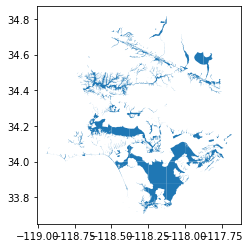

In [8]:
liquefaction.plot()

In [70]:
# Will try to limit the liquefaction zones only in the city of LA, not LA County
# But because there are so many polygons, I might miss a few
# Lovejoy Buttes. What a name.
exclude = [
    "Van Nuys",
    "Acton",
    "Agua Dulce",
    "Canoga Park",
    "Burbank",
    "Calabasas",
    "Oat Mountain",
    "Sunland",
    "San Fernando",
    "Newhall",
    "Mint Canyon",
    "Palmdale",
    "Littlerock",
    "Lovejoy Buttes",
    "Valyermo",
    "Juniper Hills",
    "Ritter Ridge",
    "Sleepy Valley",
    "Del Sur",
    "Lake Hughes",
    "Lancaster West",
    "Rosamond",
    "Lancaster East",
    "Val Verde",
    "Sunland",
    "Pacifico Mountain",
    "Whitaker Peak",
    "Malibu Beach",
    "Point Dume",
    "Triunfo Pass",
]

In [71]:
la_gdf = liquefaction[~liquefaction["QUAD_NAME"].isin(exclude)]

<AxesSubplot:>

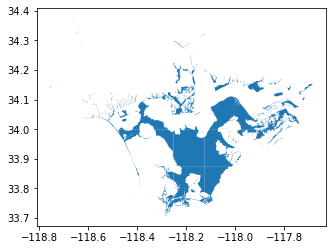

In [72]:
# Took me half an hour just to make that subset. Lots of data + looking at the map.
la_gdf.plot()

In [66]:
la_gdf.to_file("../data/processed/los_angeles_liquefaction_zones", driver="GeoJSON")